## EDA

The main purpose of this notebook is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, find interesting relations among the variables.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

C:\Users\FPT Shop\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv('..\\..\\data\\normalized\\apartment_dataset.csv')

In [4]:
df.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,price_unit,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,tỷ,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,tỷ,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,tỷ,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,tỷ,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,tỷ,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24942 entries, 0 to 24941
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   duAn           17463 non-null  object 
 1   huong          2420 non-null   object 
 2   phapLy         4901 non-null   object 
 3   noBed          23070 non-null  float64
 4   soLau          4950 non-null   float64
 5   Street         16393 non-null  object 
 6   Precinct       20100 non-null  object 
 7   District       24748 non-null  object 
 8   City           24942 non-null  object 
 9   acreage_value  24613 non-null  float64
 10  acreage_unit   24942 non-null  object 
 11  price_value    21752 non-null  float64
 12  price_unit     24942 non-null  object 
 13  noBathroom     13790 non-null  float64
dtypes: float64(5), object(9)
memory usage: 2.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
noBed,23070.0,2.627568,1.920705,1.0,2.0,3.0,3.0,100.0
soLau,4950.0,9.113535,9.428359,1.0,1.0,6.0,15.0,108.0
acreage_value,24613.0,112.035785,1803.036140,0.0,68.0,85.0,110.0,200000.0
price_value,21752.0,1796.305045,94658.482896,0.0,3.5,4.8,6.8,6650000.0
noBathroom,13790.0,1.987092,0.592193,1.0,2.0,2.0,2.0,17.0


In [7]:
continuous_features = ['noBed', 'soLau', 'acreage_value', 'price_value', 'noBathroom']
categorical_features = [feature for feature in df.columns if feature not in continuous_features]
print(continuous_features)
print(categorical_features)

['noBed', 'soLau', 'acreage_value', 'price_value', 'noBathroom']
['duAn', 'huong', 'phapLy', 'Street', 'Precinct', 'District', 'City', 'acreage_unit', 'price_unit']


In [8]:
df_categorical = df[categorical_features]

In [9]:
duAn_counts = df['duAn'].value_counts().reset_index()
duAn_counts.columns = ['duAn', 'Frequency']
duAn_counts['Percentage'] = (duAn_counts['Frequency'] / len(df)) * 100

# Display the result
print(duAn_counts)

                                     duAn  Frequency  Percentage
0             Vinhomes Ocean Park Gia Lâm        435    1.744046
1                     Vinhomes Smart City        296    1.186753
2                     Vinhomes Ocean Park        210    0.841953
3                           Goldmark City        184    0.737711
4                Hà Nội Melody Residences        180    0.721674
..                                    ...        ...         ...
988            D’. Le Pont D’or Hoàng Cầu          1    0.004009
989  Nhà ở xã hội Kiến Hưng - Lucky House          1    0.004009
990                Nhà ở xã hội EcoHome 2          1    0.004009
991                       Đường Tam Trinh          1    0.004009
992                     Sunny Garden City          1    0.004009

[993 rows x 3 columns]


In [10]:
huong_counts = df['huong'].value_counts().reset_index()
huong_counts.columns = ['huong', 'Frequency']
huong_counts['Percentage'] = (huong_counts['Frequency'] / len(df)) * 100

# Display the result
print(huong_counts)

      huong  Frequency  Percentage
0       Nam        494    1.980595
1      Đông        420    1.683907
2       Bắc        373    1.495469
3       Tây        356    1.427311
4  Đông Nam        340    1.363163
5  Đông Bắc        186    0.745730
6   Tây Nam        133    0.533237
7   Tây Bắc        118    0.473098


In [11]:
Street_counts = df['Street'].value_counts().reset_index()
Street_counts.columns = ['Street', 'Frequency']
Street_counts['Percentage'] = (Street_counts['Frequency'] / len(df)) * 100

# Display the result
print(Street_counts)

                      Street  Frequency  Percentage
0               Đường Tố Hữu       1225    4.911394
1            Đường Phạm Hùng        483    1.936493
2        Đường Phạm Văn Đồng        392    1.571646
3         Đường Lê Văn Lương        388    1.555609
4            Đường Minh Khai        356    1.427311
..                       ...        ...         ...
708            Đường Trần Vĩ          1    0.004009
709      Phố Phạm Khắc Quảng          1    0.004009
710  Đường Cầu vượt Mai Dịch          1    0.004009
711     Phố Khương Trung mới          1    0.004009
712        Đường Long Biên 2          1    0.004009

[713 rows x 3 columns]


In [12]:
Precinct_counts = df['Precinct'].value_counts().reset_index()
Precinct_counts.columns = ['Precinct', 'Frequency']
Precinct_counts['Percentage'] = (Precinct_counts['Frequency'] / len(df)) * 100

# Display the result
print(Precinct_counts)

              Precinct  Frequency  Percentage
0     Phường Mỹ Đình 2        879    3.524176
1     Phường Trung Hòa        827    3.315692
2          Xã Dương Xá        712    2.854623
3    Phường Nhân Chính        690    2.766418
4     Phường Mỹ Đình 1        689    2.762409
..                 ...        ...         ...
211  Phường Thượng Cát          1    0.004009
212    Phường Liên Mạc          1    0.004009
213  Phường Hưng Thạnh          1    0.004009
214   Phường Bạch Đằng          1    0.004009
215         Xã Sài Sơn          1    0.004009

[216 rows x 3 columns]


In [13]:
District_counts = df['District'].value_counts().reset_index()
District_counts.columns = ['District', 'Frequency']
District_counts['Percentage'] = (District_counts['Frequency'] / len(df)) * 100

# Display the result
print(District_counts)

               District  Frequency  Percentage
0      Quận Nam Từ Liêm       5048   20.238954
1         Quận Cầu Giấy       3174   12.725523
2          Quận Hà Đông       3097   12.416807
3        Quận Hoàng Mai       2481    9.947077
4       Quận Thanh Xuân       2292    9.189319
5      Quận Bắc Từ Liêm       1432    5.741320
6         Huyện Gia Lâm       1296    5.196055
7          Quận Đống Đa       1106    4.434288
8        Quận Long Biên       1070    4.289953
9           Quận Tây Hồ        982    3.937134
10    Quận Hai Bà Trưng        925    3.708604
11         Quận Ba Đình        627    2.513832
12      Huyện Thanh Trì        427    1.711972
13       Huyện Hoài Đức        393    1.575656
14       Huyện Đông Anh        176    0.705637
15       Quận Hoàn Kiếm         90    0.360837
16     Huyện Đan Phượng         74    0.296688
17     Huyện Thạch Thất         19    0.076177
18      Huyện Thanh Oai         15    0.060140
19      Huyện Chương Mỹ          6    0.024056
20        Huy

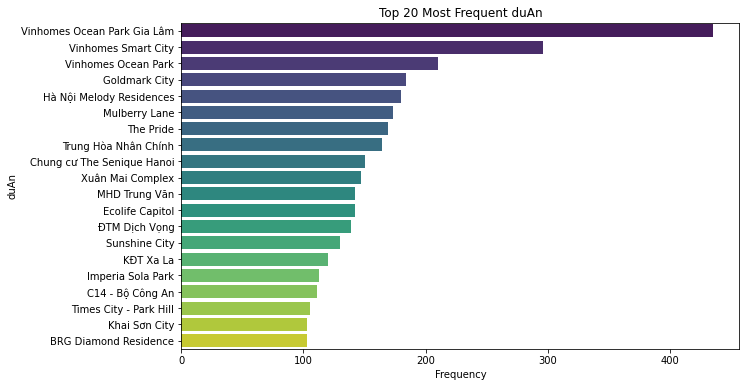

In [14]:
duAn_counts = df['duAn'].value_counts()

### Option 1: Plot the Top N Most Frequent 'duAn'
top_n = 20  # choose the top N most frequent
top_duAn_counts = duAn_counts.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_duAn_counts.values, y=top_duAn_counts.index, palette="viridis")
plt.xlabel('Frequency')
plt.ylabel('duAn')
plt.title(f'Top {top_n} Most Frequent duAn')
plt.show()

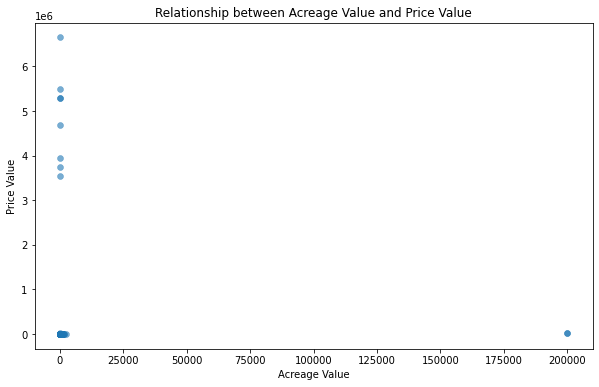

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value')
plt.show()

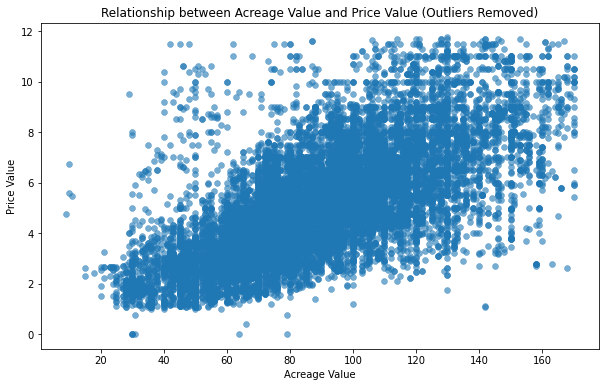

In [16]:
df_clean = df.dropna(subset=['price_value', 'acreage_value'])

# Calculate IQR to remove outliers
Q1_price = df_clean['price_value'].quantile(0.25)
Q3_price = df_clean['price_value'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_acreage = df_clean['acreage_value'].quantile(0.25)
Q3_acreage = df_clean['acreage_value'].quantile(0.75)
IQR_acreage = Q3_acreage - Q1_acreage

# Define bounds to filter out outliers
price_lower_bound = Q1_price - 1.5 * IQR_price
price_upper_bound = Q3_price + 1.5 * IQR_price

acreage_lower_bound = Q1_acreage - 1.5 * IQR_acreage
acreage_upper_bound = Q3_acreage + 1.5 * IQR_acreage

# Filter out outliers
df_filtered = df_clean[(df_clean['price_value'] >= price_lower_bound) & 
                       (df_clean['price_value'] <= price_upper_bound) & 
                       (df_clean['acreage_value'] >= acreage_lower_bound) & 
                       (df_clean['acreage_value'] <= acreage_upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

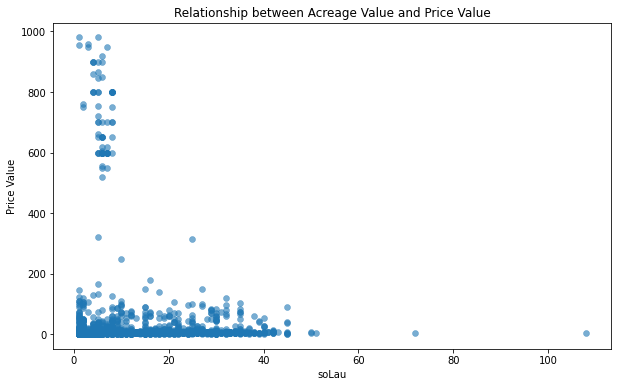

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='soLau', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('soLau')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value')
plt.show()

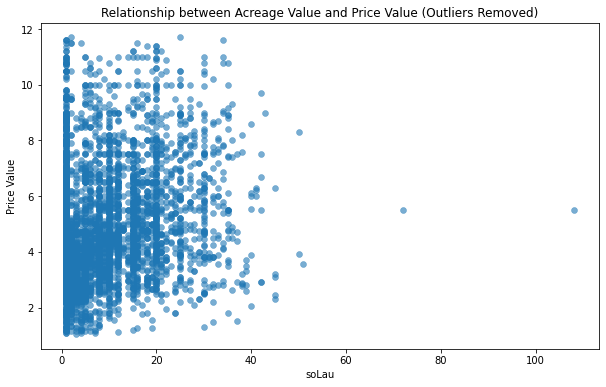

In [18]:
df_clean = df.dropna(subset=['price_value', 'acreage_value'])

# Calculate IQR to remove outliers
Q1_price = df_clean['price_value'].quantile(0.25)
Q3_price = df_clean['price_value'].quantile(0.75)
IQR_price = Q3_price - Q1_price


# Define bounds to filter out outliers
price_lower_bound = Q1_price - 1.5 * IQR_price
price_upper_bound = Q3_price + 1.5 * IQR_price


# Filter out outliers
df_filtered = df_clean[(df_clean['price_value'] >= price_lower_bound) & 
                       (df_clean['price_value'] <= price_upper_bound)]
                       

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='soLau', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('soLau')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

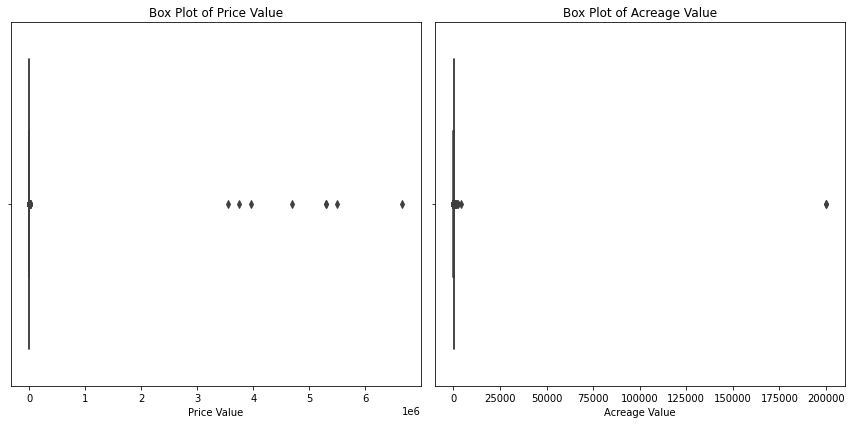

In [19]:
plt.figure(figsize=(12, 6))

# Box plot for price_value
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(data=df, x='price_value')
plt.xlabel('Price Value')
plt.title('Box Plot of Price Value')

# Box plot for acreage_value
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(data=df, x='acreage_value')
plt.xlabel('Acreage Value')
plt.title('Box Plot of Acreage Value')

# Display the plots
plt.tight_layout()
plt.show()

## Task
Cột price_value:
- loại bỏ null + giá trị = 0
- chuyển đơn vị về giá tỷ đồng -> các cột tương ứng có đơn vị là triệu ở cột price_unit chuyển về tỷ -> drop cột price unit
- loại bỏ outlier

Cột acreage_unit: bỏ

Cột value: Loại bỏ outlier

Cột city: bỏ

Cột district: nếu không có district bỏ luôn

In [20]:
df_clean = df.copy()
df_clean.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,price_unit,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,tỷ,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,tỷ,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,tỷ,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,tỷ,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,tỷ,NaN


#### price_value: remove 0s and null values


In [21]:
df_clean = df_clean[(df_clean['price_value'].notnull()) & (df_clean['price_value'] != 0)]

# Display the number of rows remaining
print(f"Number of rows after cleaning: {df_clean.shape[0]}")

Number of rows after cleaning: 21746


#### price_value: convert then drop price_unit (now only contains 'billion')

In [22]:
df_clean.loc[df_clean['price_unit'] == 'triệu', 'price_value'] /= 1000

# Drop the price_unit column
df_clean = df_clean.drop(columns=['price_unit'])

In [23]:
df_clean.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,City,acreage_value,acreage_unit,price_value,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,Hà Nội,68.0,m2,3.72,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,Hà Nội,52.0,m2,1.28,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,75.0,m2,4.80,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,Hà Nội,31.0,m2,3.00,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,Hà Nội,28.0,m2,2.15,NaN


In [12]:
df_clean.to_csv("test_data.csv", index=False)

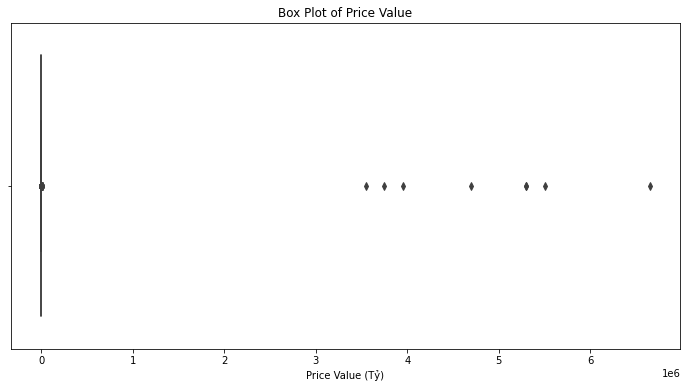

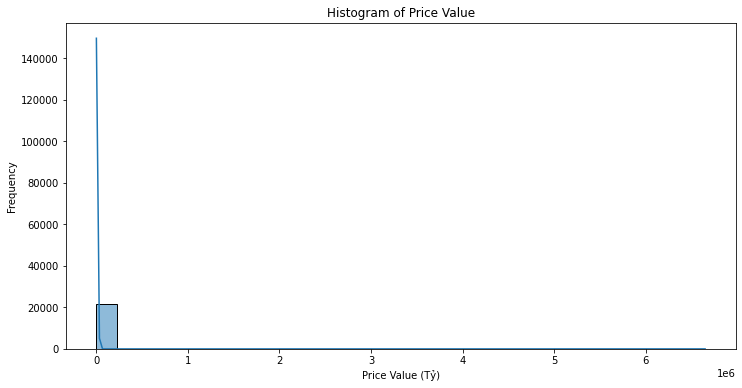

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='price_value')
plt.title('Box Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='price_value', kde=True, bins=30)
plt.title('Histogram of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.ylabel('Frequency')
plt.show()

In [25]:
price_value_counts = df_clean['price_value'].value_counts().head(10)

# Convert to a DataFrame for better readability
top_price_values = price_value_counts.reset_index()
top_price_values.columns = ['price_value', 'frequency']

# Display the top values with their frequencies
print("Top Price Values with Frequency:")
print(top_price_values)

Top Price Values with Frequency:
   price_value  frequency
0          4.5        399
1          5.0        396
2          5.5        385
3          4.0        380
4          6.0        377
5          6.5        349
6          3.5        327
7          4.2        295
8          7.0        265
9          3.0        263


In [26]:
price_value_counts = df_clean['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=False).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top Largest Price Values with Frequency:")
print(top_price_values_df)

Top Largest Price Values with Frequency:
    price_value  frequency
0     6650000.0          1
1     5500000.0          1
2     5300000.0          2
3     4695000.0          1
4     3950000.0          1
5     3750000.0          1
6     3550000.0          1
7       14000.0          1
8       13800.0          1
9       13600.0          1
10       8250.0          1
11       7689.0          1
12       6900.0          1
13       6450.0          1
14       6200.0          1
15       6000.0          1
16       5400.0          1
17       5200.0          1
18       4800.0          1
19       4050.0          1


In [27]:
price_value_counts = df_clean['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=True).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top smallest Price Values with Frequency:")
print(top_price_values_df)

Top smallest Price Values with Frequency:
    price_value  frequency
0       0.00040          1
1       0.00074          1
2       0.00075          1
3       0.00110          1
4       0.00156          1
5       0.00228          1
6       0.00250          3
7       0.00260          1
8       0.00265          1
9       0.00270          2
10      0.00277          2
11      0.00300          1
12      0.00340          1
13      0.00360          1
14      0.00368          1
15      0.00385          1
16      0.00439          1
17      0.00458          1
18      0.00480          1
19      0.00495          1


In [29]:
price_value_counts = df_clean['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=True).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top smallest Price Values with Frequency:")
print(top_price_values_df)

Top smallest Price Values with Frequency:
    price_value  frequency
0       0.00040          1
1       0.00074          1
2       0.00075          1
3       0.00110          1
4       0.00156          1
5       0.00228          1
6       0.00250          3
7       0.00260          1
8       0.00265          1
9       0.00270          2
10      0.00277          2
11      0.00300          1
12      0.00340          1
13      0.00360          1
14      0.00368          1
15      0.00385          1
16      0.00439          1
17      0.00458          1
18      0.00480          1
19      0.00495          1


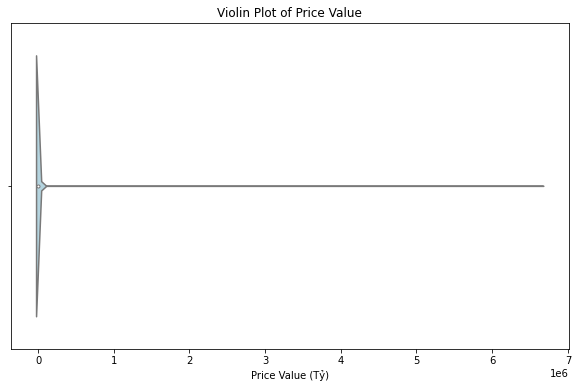

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_clean, x='price_value', color='lightblue')
plt.title('Violin Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

In [31]:
df_price = df_clean[df_clean['price_value'] <= 100]
print(f"Number of rows after cleaning: {df_price.shape[0]}")

Number of rows after cleaning: 21689


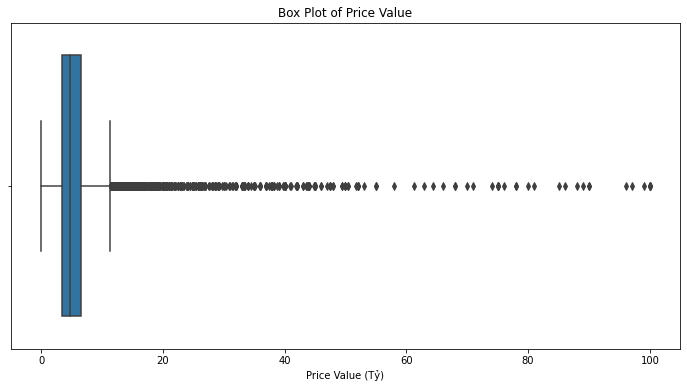

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_price, x='price_value')
plt.title('Box Plot of Price Value')
plt.xlabel('Price Value (Tỷ)')
plt.show()

In [37]:
price_value_counts = df_clean['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=True).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top smallest Price Values with Frequency:")
print(top_price_values_df)

Top smallest Price Values with Frequency:
    price_value  frequency
0       0.00040          1
1       0.00074          1
2       0.00075          1
3       0.00110          1
4       0.00156          1
5       0.00228          1
6       0.00250          3
7       0.00260          1
8       0.00265          1
9       0.00270          2
10      0.00277          2
11      0.00300          1
12      0.00340          1
13      0.00360          1
14      0.00368          1
15      0.00385          1
16      0.00439          1
17      0.00458          1
18      0.00480          1
19      0.00495          1


In [53]:
Q1 = df_clean['price_value'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_clean['price_value'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                          # Interquartile range

# Define the lower and upper bounds
lower_bound = 0.1
upper_bound = Q3 + 1.09 * IQR

print(lower_bound, upper_bound)
# Remove rows with outliers
df_no_outliers = df_clean[(df_clean['price_value'] >= lower_bound) & (df_clean['price_value'] <= upper_bound)]

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_clean)}")

0.1 10.1425
Number of rows before removing outliers: 24942
Number of rows after removing outliers: 21746


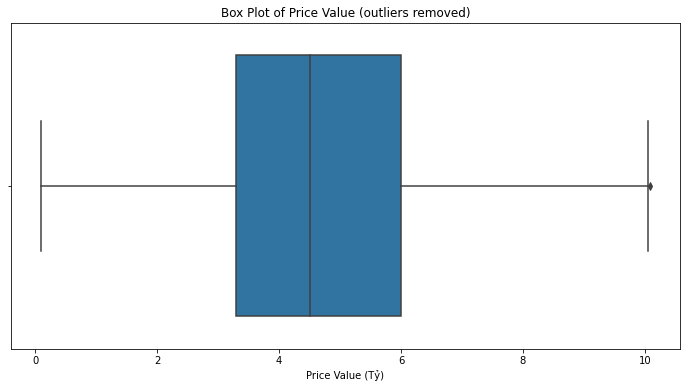

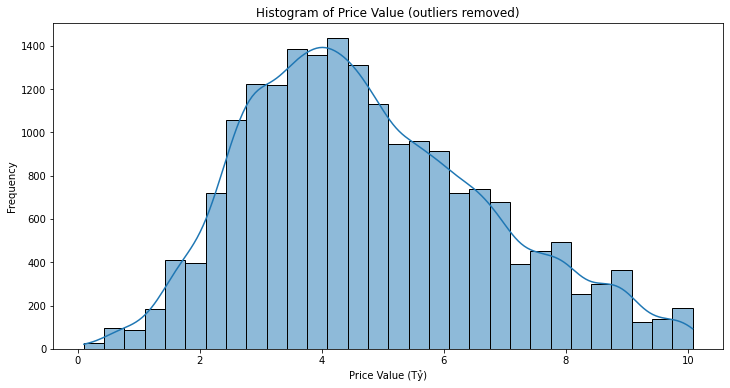

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='price_value')
plt.title('Box Plot of Price Value (outliers removed)')
plt.xlabel('Price Value (Tỷ)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='price_value', kde=True, bins=30)
plt.title('Histogram of Price Value (outliers removed)')
plt.xlabel('Price Value (Tỷ)')
plt.ylabel('Frequency')
plt.show()

In [55]:
price_value_counts = df_no_outliers['price_value'].value_counts()

# Sort by the price_value in descending order
top_price_values = price_value_counts.sort_index(ascending=False).head(20)

# Convert to a DataFrame for better readability
top_price_values_df = top_price_values.reset_index()
top_price_values_df.columns = ['price_value', 'frequency']

# Display the top values and their frequencies
print("Top Largest Price Values with Frequency:")
print(top_price_values_df)

Top Largest Price Values with Frequency:
    price_value  frequency
0         10.08          1
1         10.05          2
2         10.03          1
3         10.00        124
4          9.99          1
5          9.97          2
6          9.95          1
7          9.90         17
8          9.86          1
9          9.85          3
10         9.84          1
11         9.81          1
12         9.80         28
13         9.78          1
14         9.76          1
15         9.75          4
16         9.72          1
17         9.70         21
18         9.68          3
19         9.65          4


In [56]:
df_final = df_no_outliers.copy()

### acreage_value

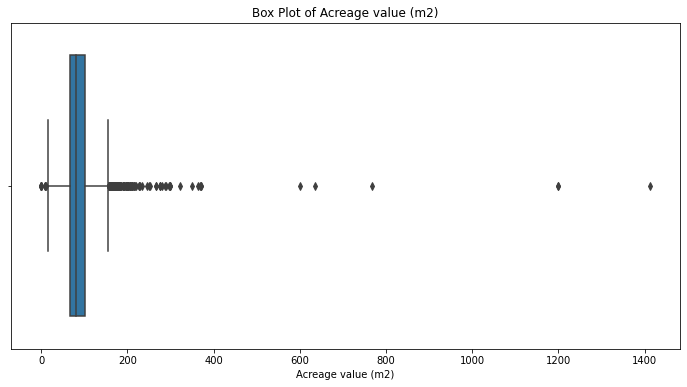

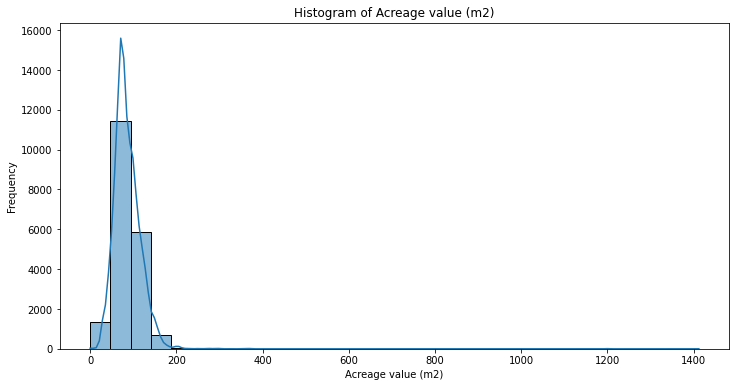

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='acreage_value')
plt.title('Box Plot of Acreage value (m2)')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='acreage_value', kde=True, bins=30)
plt.title('Histogram of Acreage value (m2)')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

In [64]:
Q1_a = df_no_outliers['acreage_value'].quantile(0.25)  # First quartile (25th percentile)
Q3_a = df_no_outliers['acreage_value'].quantile(0.75)  # Third quartile (75th percentile)
IQR_a = Q3_a - Q1_a                          # Interquartile range

# Define the lower and upper bounds
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

print(lower_bound_a, upper_bound_a)
# Remove rows with outliers
df_no_outliers = df_no_outliers[(df_no_outliers['acreage_value'] >= lower_bound_a) & (df_no_outliers['acreage_value'] <= upper_bound_a)]

# Display the number of rows before and after removing outliers
# print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

15.0 151.0
Number of rows after removing outliers: 18966


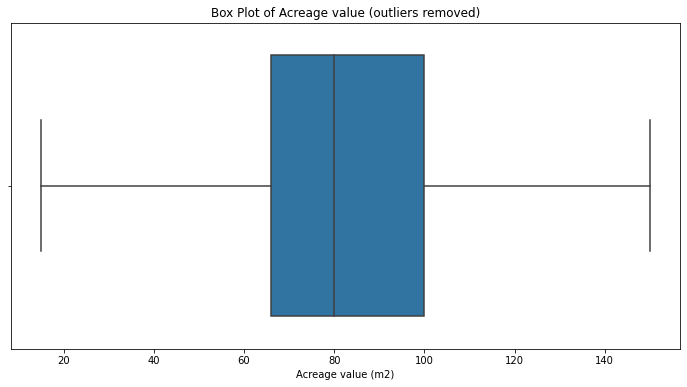

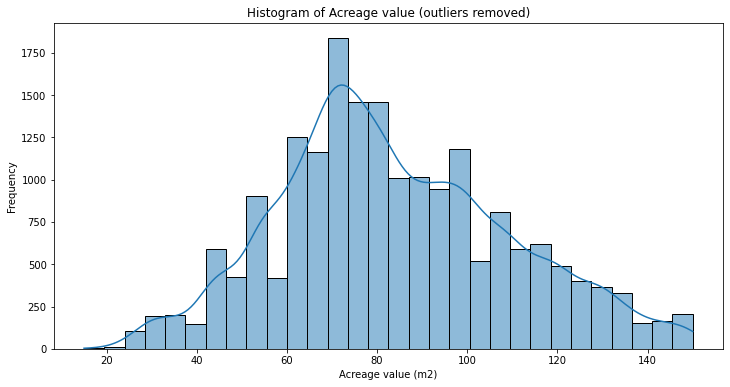

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='acreage_value')
plt.title('Box Plot of Acreage value (outliers removed)')
plt.xlabel('Acreage value (m2)')
plt.show()

# Histogram of price_value
plt.figure(figsize=(12, 6))
sns.histplot(data=df_no_outliers, x='acreage_value', kde=True, bins=30)
plt.title('Histogram of Acreage value (outliers removed)')
plt.xlabel('Acreage value (m2)')
plt.ylabel('Frequency')
plt.show()

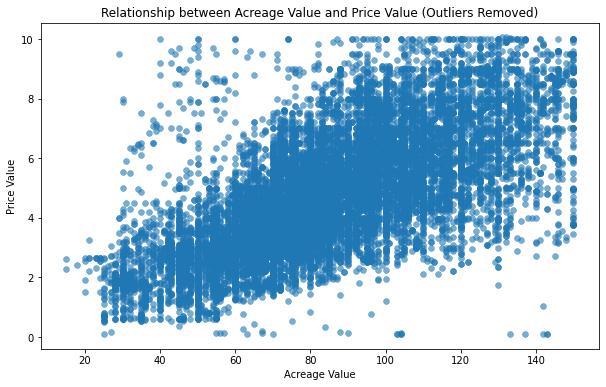

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

#### drop acreage_unit

In [67]:
acreage_unit_counts = df_no_outliers['acreage_unit'].value_counts()

# Display the result
print("Unique values in acreage_unit and their counts:")
print(acreage_unit_counts)

Unique values in acreage_unit and their counts:
m2    18966
Name: acreage_unit, dtype: int64


In [68]:
df_no_outliers = df_no_outliers.drop(columns=['acreage_unit'])

In [69]:
df_no_outliers = df_no_outliers.drop(columns=['City'])

In [70]:
df_no_outliers.head()

,duAn,huong,phapLy,noBed,soLau,Street,Precinct,District,acreage_value,price_value,noBathroom
0,Vinhomes Ocean Park,Đông Bắc,NaN,NaN,NaN,NaN,Xã Dương Xá,Huyện Gia Lâm,68.0,3.72,NaN
1,Đường Trích Sài,NaN,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Trích Sài,Phường Thụy Khuê,Quận Tây Hồ,52.0,1.28,NaN
2,Vinhomes Smart City,NaN,NaN,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,75.0,4.80,NaN
3,Vinhomes Cổ Loa,NaN,NaN,NaN,NaN,NaN,Xã Cổ Loa,Huyện Đông Anh,31.0,3.00,NaN
4,Vinhomes Smart City,Đông Bắc,Giấy chứng nhận quyền sở hữu đất,NaN,NaN,Đường Đại Mỗ,Phường Đại Mỗ,Quận Nam Từ Liêm,28.0,2.15,NaN


#### check if any of District is missing

In [71]:
dist_null = df_no_outliers['District'].isnull().sum()
dist_null


131

In [73]:
df_no_outliers = df_no_outliers.dropna(subset=['District'])
df_no_outliers.shape[0]

18835

In [74]:
dist_null = df_no_outliers['District'].isnull().sum()
dist_null

0

In [105]:
filtered_df = df_no_outliers[(df_no_outliers['price_value'] < 1) & (df_no_outliers['acreage_value'] > 60)]

# Display the filtered DataFrame
print(filtered_df[['price_value', 'acreage_value']])

       price_value  acreage_value
383          0.780           62.0
3322         0.768           96.0
4671         0.102          137.0
6664         0.100          142.0
7081         0.520           75.0
7261         0.140           90.0
7269         0.100           70.0
7274         0.180           88.0
10960        0.123          104.0
11686        0.117           67.0
11937        0.200           67.0
13654        0.100          103.0
13744        0.100          103.0
20813        0.435           65.0
21133        0.100          133.0
21586        0.264           62.0
22547        0.330           84.0
22786        0.850           80.0


In [106]:
df_no_outliers = df_no_outliers[~((df_no_outliers['price_value'] < 1) & (df_no_outliers['acreage_value'] > 60))]

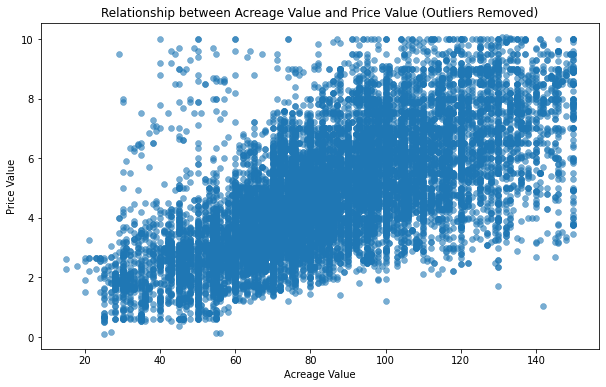

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='acreage_value', y='price_value', alpha=0.6, edgecolor=None)
plt.xlabel('Acreage Value')
plt.ylabel('Price Value')
plt.title('Relationship between Acreage Value and Price Value (Outliers Removed)')
plt.show()

In [108]:
df_no_outliers.shape[0]

18817

### Summary
Raw data samples: 24942 <br />
After processing price_value column: 21746 <br />
After processing acreage_value column: 19704 <br />
After removing null values in District: 19566 <br />
After removing outliers: 18817 <br />

In [75]:
df_no_outliers.to_csv('..\\..\\data\\normalized\\clean_dataset.csv', index = False)

## processing duAn

In [110]:
unique_duan_values = df_no_outliers['duAn'].unique()
unique_duan_values

array(['Vinhomes Ocean Park', 'Đường Trích Sài', 'Vinhomes Smart City',
       'Vinhomes Cổ Loa', 'Tòa nhà Licogi 12', 'VP3 Linh Đàm',
       'Phường Mỹ Đình 2', 'Quận Hoàng Mai', 'Quận Đống Đa',
       'Phường Hoàng Liệt', 'Đường Trần Phú',
       'Nhà ở xã hội Rice City Tây Nam Linh Đàm',
       'Khu đô thị Trung Hòa - Nhân Chính', 'Phố Trần Quý Kiên',
       'Quận Hà Đông', 'Rainbow Linh Đàm', 'đường Tây Mỗ', 'Phố Xã Đàn',
       'Phố Chùa Bộc', 'Phường Phú La', 'Phường Dương Nội',
       'Đường Đại Cồ Việt', 'Đường Nguyễn Trãi', 'Đường Phạm Ngọc Thạch',
       'Đường Giải Phóng', 'Đường Phạm Hùng', 'Đường Vĩnh Phúc',
       'Đường Đông Tác', 'Đường Mễ Trì Hạ', 'Phường Thượng Đình',
       'Đường Đại lộ Thăng Long', 'Phường Giang Biên', 'HC Golden City',
       'Eco City Việt Hưng', 'Phố Bạch Mai', 'Phố Hồng Mai',
       'Đường Phan Đình Giót', 'Đường Hồ Ba Mẫu', 'Đường Trung Phụng',
       'Đường Đội Cấn', 'Đường Phúc La', 'Đường Trần Khát Chân',
       'Phường Phúc La', 'Đường Hồ 

### to do: handle duAn and missing values